In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv

In [2]:
from tensorflow.python.client import device_lib

print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.9.0
GPU detected: []


In [3]:
data = read_tsv('../dataset/comlid-data-140422-v1.tsv')

In [4]:
all_data, words, tags = data

In [5]:
df = list_to_dataframe(data)

In [6]:
words = get_unique_words(df)
tags = get_unique_tags(df)

In [7]:
dt_pair = to_token_tag_list(data)

In [8]:
X, y = input_data(words, tags, dt_pair)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
num_words = len(words)
num_tags = len(tags)
max_len = 50
model = blstm_model(num_words, num_tags, max_len)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1344500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 7)            1407      
 ibuted)                                                         
                                                                 
Total params: 1,466,707
Trainable params: 1,466,707
Non-trainable params: 0
______________________________________________

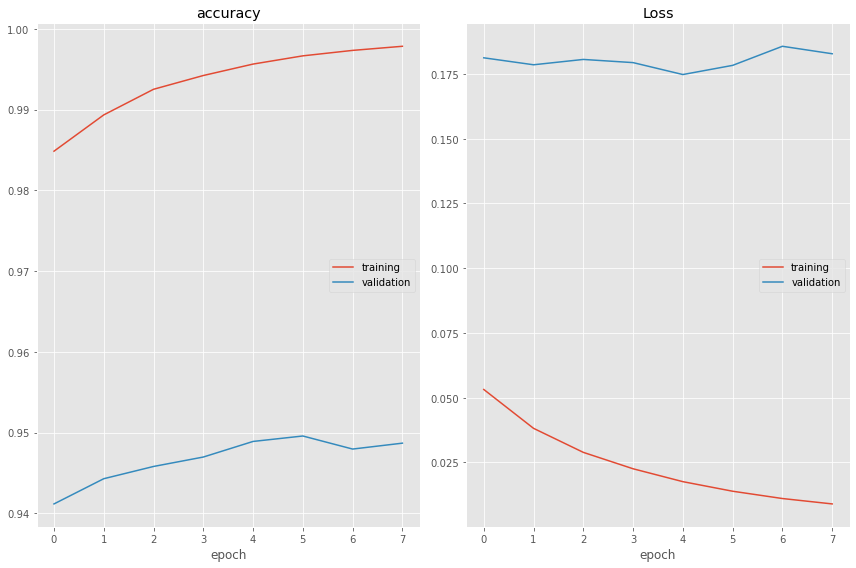

accuracy
	training         	 (min:    0.985, max:    0.998, cur:    0.998)
	validation       	 (min:    0.941, max:    0.950, cur:    0.949)
Loss
	training         	 (min:    0.009, max:    0.053, cur:    0.009)
	validation       	 (min:    0.175, max:    0.186, cur:    0.183)

Epoch 8: val_loss did not improve from 0.17478
56/56 [==============================] - 1s 12ms/step - loss: 0.1828 - accuracy: 0.9487
[0.18281297385692596, 0.9487029910087585]


In [13]:
training_history(model, x_train, y_train, x_test, y_test, num_epoch=20, batch_sz=32)

56/56 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

   MIX-ID-EN       0.97      0.82      0.89       996
   MIX-ID-JV       0.66      0.78      0.71       318
           O       0.98      0.97      0.98     56067
          EN       0.88      0.87      0.87      5202
          ID       0.90      0.95      0.93     21495
          JV       0.84      0.85      0.85      4734
   MIX-JV-EN       0.89      0.78      0.83       238

    accuracy                           0.95     89050
   macro avg       0.88      0.86      0.87     89050
weighted avg       0.95      0.95      0.95     89050



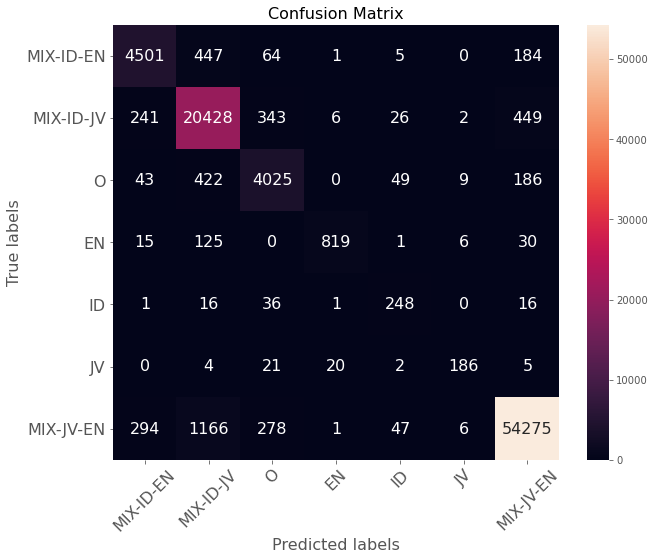

In [14]:
performance_report(model, x_test, y_test, tags, df)